# Set up project

In [1]:
# Install tmdbsimple (only need to run once)
!pip install tmdbsimple

In [2]:
 !pip install tqdm

In [3]:
# open the json
import json
with open("C:\\Users\\Elizabeth Spreng\\.secret\\tmbd_api.json", 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key'])

In [4]:
# load tmbd simple
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [5]:
#import libraries
import pandas as pd

#import 
from tqdm.notebook import trange, tqdm
from tqdm.notebook import tqdm_notebook 

#  Exploratory Data

- How many movies had at least some valid financial information (values > 0 for budget OR revenue)? Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
- How many movies are there in each of the certification categories (G/PG/PG-13/R)?
- What is the average revenue per certification category?
- What is the average budget per certification category?

## Import libraries for EDA

In [6]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker



## Load the Data

In [7]:
df_2000 = pd.read_csv('Data/tmdb_api_results_2000.json')

In [8]:
df_2000.head()

,Unnamed: 0,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2162.0,PG


In [9]:
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1228 non-null   int64  
 1   imdb_id                1228 non-null   object 
 2   adult                  1227 non-null   float64
 3   backdrop_path          670 non-null    object 
 4   belongs_to_collection  112 non-null    object 
 5   budget                 1227 non-null   float64
 6   genres                 1227 non-null   object 
 7   homepage               64 non-null     object 
 8   id                     1227 non-null   float64
 9   original_language      1227 non-null   object 
 10  original_title         1227 non-null   object 
 11  overview               1204 non-null   object 
 12  popularity             1227 non-null   float64
 13  poster_path            1103 non-null   object 
 14  production_companies   1227 non-null   object 
 15  prod

In [10]:
# Read the data
df_api_2000 = pd.read_json('Data4/tmdb_api_results_2000.json')
df_api_2000.to_csv('Data4/tmdb_api_results_2000.json')



### Inspect the 2000 Data

In [11]:
df_api_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,None,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,
2,tt0113092,0.0,None,None,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,
3,tt0116391,0.0,None,None,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,None,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2175.0,PG


In [12]:
df_api_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1229 non-null   object 
 1   adult                  1228 non-null   float64
 2   backdrop_path          670 non-null    object 
 3   belongs_to_collection  112 non-null    object 
 4   budget                 1228 non-null   float64
 5   genres                 1228 non-null   object 
 6   homepage               1228 non-null   object 
 7   id                     1228 non-null   float64
 8   original_language      1228 non-null   object 
 9   original_title         1228 non-null   object 
 10  overview               1228 non-null   object 
 11  popularity             1228 non-null   float64
 12  poster_path            1104 non-null   object 
 13  production_companies   1228 non-null   object 
 14  production_countries   1228 non-null   object 
 15  rele

In [13]:
df_api_2000['budget'].describe()

count    1.228000e+03
mean     5.225124e+06
std      1.703577e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.275000e+08
Name: budget, dtype: float64

### Inspect the 2001 Data

In [14]:
# Read the data
df_api_2001 = pd.read_json('Data4/tmdb_api_results_2001.json')
df_api_2001.to_csv('Data4/tmdb_api_results_2001.json')

In [15]:
df_api_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,None,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1181.0,PG-13
2,tt0114447,0.0,None,None,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,None,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.524,123.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,None,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.100,29.0,R


In [16]:
df_api_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1318 non-null   object 
 1   adult                  1317 non-null   float64
 2   backdrop_path          704 non-null    object 
 3   belongs_to_collection  92 non-null     object 
 4   budget                 1317 non-null   float64
 5   genres                 1317 non-null   object 
 6   homepage               1317 non-null   object 
 7   id                     1317 non-null   float64
 8   original_language      1317 non-null   object 
 9   original_title         1317 non-null   object 
 10  overview               1317 non-null   object 
 11  popularity             1317 non-null   float64
 12  poster_path            1184 non-null   object 
 13  production_companies   1317 non-null   object 
 14  production_countries   1317 non-null   object 
 15  rele

In [35]:
#combine the two dataframes
combined_df = pd.concat([df_api_2000, df_api_2001], ignore_index=True, sort=False)

In [36]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2547 non-null   object 
 1   adult                  2545 non-null   float64
 2   backdrop_path          1374 non-null   object 
 3   belongs_to_collection  204 non-null    object 
 4   budget                 2545 non-null   float64
 5   genres                 2545 non-null   object 
 6   homepage               2545 non-null   object 
 7   id                     2545 non-null   float64
 8   original_language      2545 non-null   object 
 9   original_title         2545 non-null   object 
 10  overview               2545 non-null   object 
 11  popularity             2545 non-null   float64
 12  poster_path            2288 non-null   object 
 13  production_companies   2545 non-null   object 
 14  production_countries   2545 non-null   object 
 15  rele

In [40]:
## Save current dataframe to file.
combined_df.to_csv("Data4/tmdb_combined.csv.gz",compression='gzip',index=False)



In [41]:
combined=pd.read_csv('Data4/tmdb_combined.csv.gz')

In [42]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2547 non-null   object 
 1   adult                  2545 non-null   float64
 2   backdrop_path          1374 non-null   object 
 3   belongs_to_collection  204 non-null    object 
 4   budget                 2545 non-null   float64
 5   genres                 2545 non-null   object 
 6   homepage               172 non-null    object 
 7   id                     2545 non-null   float64
 8   original_language      2545 non-null   object 
 9   original_title         2545 non-null   object 
 10  overview               2494 non-null   object 
 11  popularity             2545 non-null   float64
 12  poster_path            2288 non-null   object 
 13  production_companies   2545 non-null   object 
 14  production_countries   2545 non-null   object 
 15  rele

### Visual #1

- - How many movies had at least some valid financial information (values > 0 for budget OR revenue)? Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

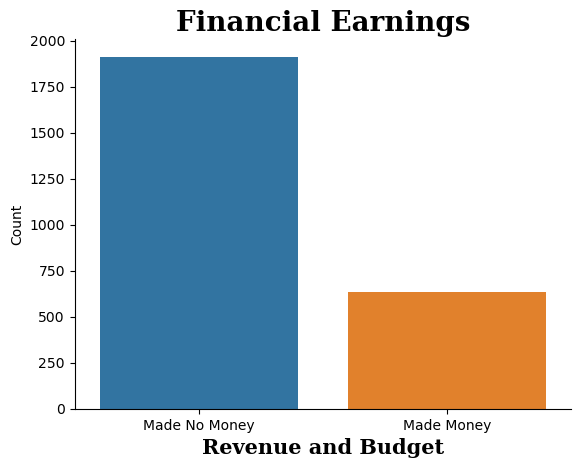

In [19]:
combined_monies = (combined_df["budget"]> 0) | (combined_df['revenue'] > 0)

plot=combined_df[combined_monies]

ax= sns.countplot(x=combined_monies)
ax.set_title('Financial Earnings', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('xxx', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
plt.xlabel('Revenue and Budget')
ax.set_xticklabels(['Made No Money', 'Made Money'])
plt.ylabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


### Visual #2

-  How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [20]:
#check the certification counts
combined_df['certification'].value_counts()

           853
R          459
PG-13      183
NR          73
PG          62
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

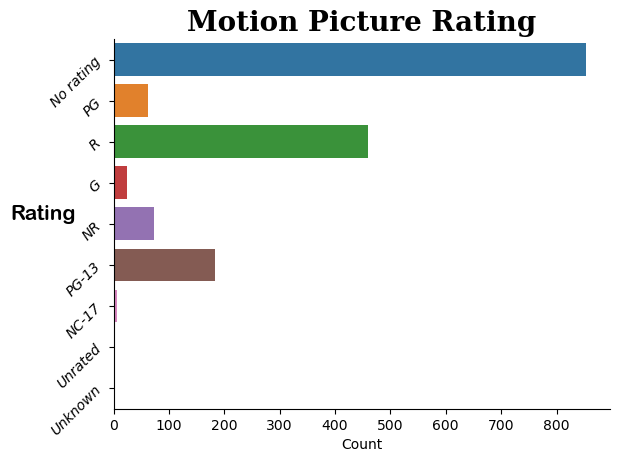

In [21]:
#create the countplot
ax= sns.countplot(data=combined_df, y='certification')
ax.set_title('Motion Picture Rating', fontfamily='serif',fontsize = 20, fontweight = 'bold');

plt.xlabel('Count')
plt.ylabel('Rating', fontfamily='Arial Rounded MT Bold', fontsize = 15, rotation = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticklabels(labels = ['No rating','PG', 'R', 'G', 'NR', 'PG-13','NC-17', 'Unrated', 'Unknown'], 
                   rotation=45, 
                   fontstyle='italic', 
                   color='black');

### Visual #3

- What is the average revenue per certification category?


In [22]:
import matplotlib.ticker as tkr

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s


y_format = tkr.FuncFormatter(func)  # make formatter


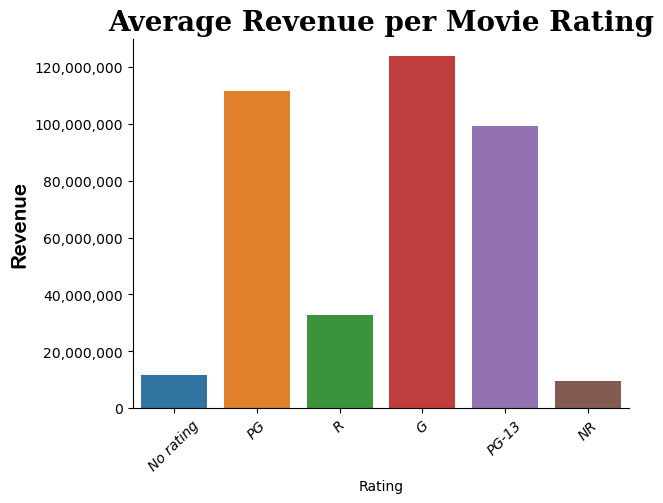

In [23]:
ax=sns.barplot(data=plot, x='certification', y= 'revenue', errorbar=None);
ax.set_title('Average Revenue per Movie Rating', fontfamily='serif',fontsize = 20, fontweight = 'bold');

plt.xlabel('Rating')
plt.ylabel('Revenue', fontfamily='Arial Rounded MT Bold', fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(labels = ['No rating','PG', 'R', 'G', 'PG-13','NR'], 
                   rotation=45, 
                   fontstyle='italic', 
                   color='black');

- What is the average budget per certification category?


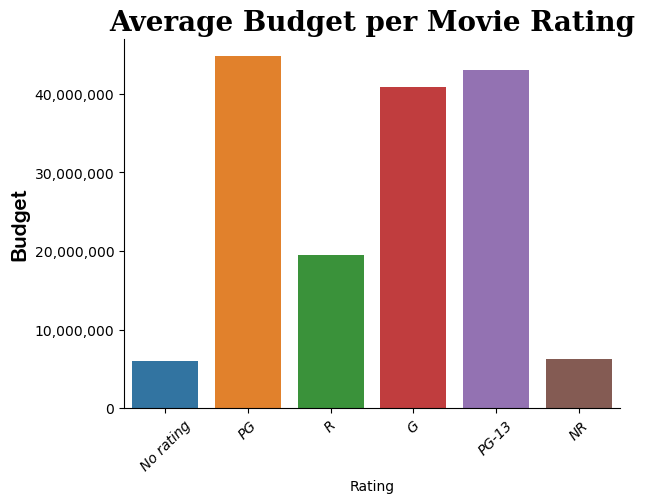

In [24]:
#create the visual
ax=sns.barplot(data=plot, x='certification', y= 'budget', errorbar=None);
ax.set_title('Average Budget per Movie Rating', fontfamily='serif',fontsize = 20, fontweight = 'bold');

plt.xlabel('Rating')
plt.ylabel('Budget', fontfamily='Arial Rounded MT Bold', fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(labels = ['No rating','PG', 'R', 'G', 'PG-13','NR'], 
                   rotation=45, 
                   fontstyle='italic', 
                   color='black');